In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data=pd.read_csv('/content/drive/My Drive/data/data1.csv',low_memory=False)

In [0]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaN,2016-01-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaN,2013-09-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,n,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaN,2016-01-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,21.0,37,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaN,2015-01-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null int64
funded_amnt                    855969 non-null int64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan               

In [0]:
final_data=data.drop(['verification_status_joint','dti_joint','annual_inc_joint','addr_state','emp_length','id','initial_list_status',
                'member_id','mths_since_last_major_derog','out_prncp','out_prncp_inv','policy_code','pub_rec','total_rec_prncp',
                'zip_code','il_util','open_il_12m','open_il_24m','mths_since_rcnt_il','max_bal_bc','open_rv_12m','open_rv_24m',
                'all_util','total_bal_il','inq_fi','total_cu_tl','inq_last_12m','mths_since_last_record','sub_grade',
                'open_acc_6m','open_il_6m','desc'],axis=1)



In [0]:
final_data=final_data.drop(['emp_title',
'pymnt_plan',
'title',
'earliest_cr_line',
'mths_since_last_delinq', 
'application_type',
'next_pymnt_d'],axis=1)



In [0]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 34 columns):
loan_amnt                     855969 non-null int64
funded_amnt                   855969 non-null int64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null object
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null object
home_ownership                855969 non-null object
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
issue_d                       855969 non-null object
purpose                       855969 non-null object
dti                           855969 non-null float64
delinq_2yrs                   855969 non-null int64
inq_last_6mths                855969 non-null int64
open_acc                      855969 non-null int64
revol_bal                     855969 non-

In [0]:
final_data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
revol_bal                         0
revol_util                      446
total_acc                         0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_d                   8862
last_pymnt_amnt                   0
last_credit_pull_d          

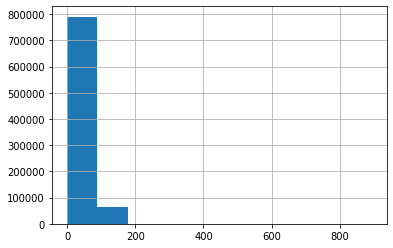

In [0]:
final_data['revol_util'].hist()

In [0]:
final_data["revol_util"].fillna(data["revol_util"].median(),inplace=True)


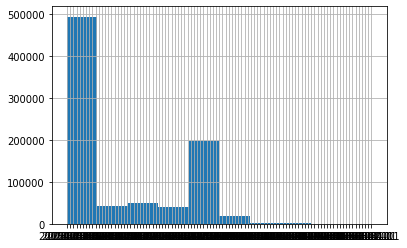

In [0]:
final_data['last_pymnt_d'].hist()
 

In [0]:
final_data["last_pymnt_d"].fillna(method="ffill",inplace=True)

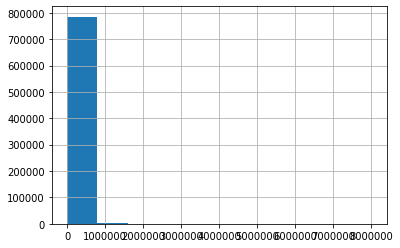

In [0]:
final_data['tot_cur_bal'].hist()


In [0]:
final_data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
revol_bal                         0
revol_util                        0
total_acc                         0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_d                      0
last_pymnt_amnt                   0
last_credit_pull_d          

In [0]:
final_data["tot_cur_bal"].fillna(data["tot_cur_bal"].median(),inplace=True)

In [0]:
final_data["last_credit_pull_d"].fillna(method="ffill",inplace=True)


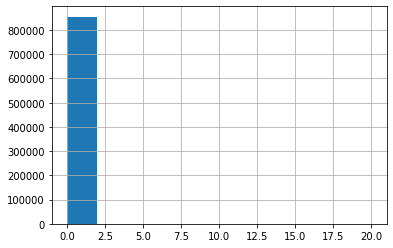

In [0]:
final_data['collections_12_mths_ex_med'].hist()


In [0]:
final_data["collections_12_mths_ex_med"].fillna(data["collections_12_mths_ex_med"].median(),inplace=True)

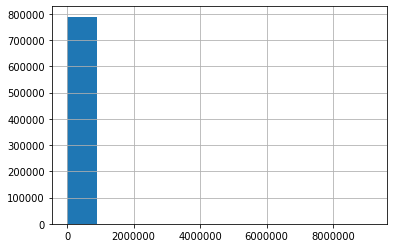

In [0]:
final_data['tot_coll_amt'].hist()


In [0]:
final_data["tot_coll_amt"].fillna(data["tot_coll_amt"].median(),inplace=True)

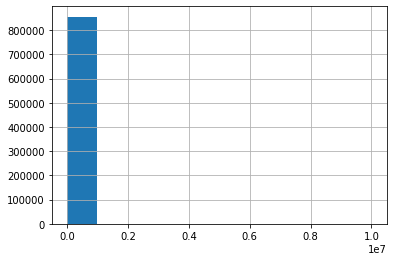

In [0]:
final_data['total_rev_hi_lim'].hist()

In [0]:

final_data["total_rev_hi_lim"].fillna(data["total_rev_hi_lim"].median(),inplace=True)


In [0]:
final_data.isnull().sum()


loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_

In [14]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 34 columns):
loan_amnt                     855969 non-null int64
funded_amnt                   855969 non-null int64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null object
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null object
home_ownership                855969 non-null object
annual_inc                    855969 non-null float64
verification_status           855969 non-null object
issue_d                       855969 non-null object
purpose                       855969 non-null object
dti                           855969 non-null float64
delinq_2yrs                   855969 non-null int64
inq_last_6mths                855969 non-null int64
open_acc                      855969 non-null int64
revol_bal                     855969 non-

In [0]:
from sklearn import preprocessing
l_encoder=preprocessing.LabelEncoder()
final_data["term"]=l_encoder.fit_transform(final_data["term"])
final_data["grade"]=l_encoder.fit_transform(final_data["grade"])
final_data["purpose"]=l_encoder.fit_transform(final_data["purpose"])
final_data["term"]=l_encoder.fit_transform(final_data["term"])
final_data["home_ownership"]=l_encoder.fit_transform(final_data["home_ownership"])
final_data["verification_status"]=l_encoder.fit_transform(final_data["verification_status"])



In [0]:
final_data=final_data.drop(['last_pymnt_d',
'last_credit_pull_d'
],axis=1)


In [0]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 32 columns):
loan_amnt                     855969 non-null int64
funded_amnt                   855969 non-null int64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null int64
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null int64
home_ownership                855969 non-null int64
annual_inc                    855969 non-null float64
verification_status           855969 non-null int64
issue_d                       855969 non-null object
purpose                       855969 non-null int64
dti                           855969 non-null float64
delinq_2yrs                   855969 non-null int64
inq_last_6mths                855969 non-null int64
open_acc                      855969 non-null int64
revol_bal                     855969 non-null 

In [0]:
final_data['issue_d']


0         2011-12-01
1         2011-12-01
2         2011-12-01
3         2011-12-01
4         2011-12-01
             ...    
855964    2015-01-01
855965    2015-01-01
855966    2015-01-01
855967    2015-01-01
855968    2015-01-01
Name: issue_d, Length: 855969, dtype: object

In [0]:
y=final_data['default_ind']
x=final_data.drop(['default_ind'],axis=1)

In [0]:
final_data['issue_d'] = pd.to_datetime(final_data['issue_d'])
final_data = final_data.set_index(final_data['issue_d'])
final_data = final_data.sort_index()

In [19]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 855969 entries, 2007-06-01 to 2015-12-01
Data columns (total 32 columns):
loan_amnt                     855969 non-null int64
funded_amnt                   855969 non-null int64
funded_amnt_inv               855969 non-null float64
term                          855969 non-null int64
int_rate                      855969 non-null float64
installment                   855969 non-null float64
grade                         855969 non-null int64
home_ownership                855969 non-null int64
annual_inc                    855969 non-null float64
verification_status           855969 non-null int64
issue_d                       855969 non-null datetime64[ns]
purpose                       855969 non-null int64
dti                           855969 non-null float64
delinq_2yrs                   855969 non-null int64
inq_last_6mths                855969 non-null int64
open_acc                      855969 non-null int64
revol_bal             

In [20]:
data_train = final_data['2007-06-01':'2015-05-01']
data_test  = final_data['2015-05-01':]
print('Train Dataset:',data_train.shape)
print('Test Dataset:',data_test.shape)

Train Dataset: (598978, 32)
Test Dataset: (287914, 32)


In [21]:
data_train=data_train.drop(['issue_d'],axis=1)
data_test=data_test.drop(['issue_d'],axis=1)
print('Train Dataset:',data_train.shape)
print('Test Dataset:',data_test.shape)

Train Dataset: (598978, 31)
Test Dataset: (287914, 31)


In [0]:
 
print('Train Dataset:',data_train.shape)
print('Test Dataset:',data_test.shape)

Train Dataset: (598978, 31)
Test Dataset: (287914, 31)


In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598978 entries, 2007-06-01 to 2015-05-01
Data columns (total 31 columns):
loan_amnt                     598978 non-null int64
funded_amnt                   598978 non-null int64
funded_amnt_inv               598978 non-null float64
term                          598978 non-null int64
int_rate                      598978 non-null float64
installment                   598978 non-null float64
grade                         598978 non-null int64
home_ownership                598978 non-null int64
annual_inc                    598978 non-null float64
verification_status           598978 non-null int64
purpose                       598978 non-null int64
dti                           598978 non-null float64
delinq_2yrs                   598978 non-null int64
inq_last_6mths                598978 non-null int64
open_acc                      598978 non-null int64
revol_bal                     598978 non-null int64
revol_util                    5

In [0]:
#train data split

y_train=data_train['default_ind']
x_train=data_train.drop(['default_ind'],axis=1)


In [0]:
#test data split

y_test=data_test['default_ind']
x_test=data_test.drop(['default_ind'],axis=1)


In [0]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
y_pred=model_lr.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))


-5.815352286991915


In [0]:
#naive bayes classifier
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train, y_train)
y_pred=model_nb.predict(x_test)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("classification_report : \n", classification_report(y_test, y_pred))
print("Accuracy of model is : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : " )
print(confusion_matrix(y_test, y_pred))

classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    287296
           1       0.07      0.02      0.03       618

    accuracy                           1.00    287914
   macro avg       0.53      0.51      0.51    287914
weighted avg       1.00      1.00      1.00    287914

Accuracy of model is :  0.9973499030960634
Confusion matrix : 
[[287140    156]
 [   607     11]]


In [0]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(x_train, y_train)
y_pred=model_LR.predict(x_test)


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("classification_report : \n", classification_report(y_test, y_pred))
print("Accuracy of model is : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : " )
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    287296
           1       0.02      0.10      0.03       618

    accuracy                           0.99    287914
   macro avg       0.51      0.55      0.51    287914
weighted avg       1.00      0.99      0.99    287914

Accuracy of model is :  0.9860513903457282
Confusion matrix : 
[[283834   3462]
 [   554     64]]


In [0]:
#KNN CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)
y_pred=model_knn.predict(x_test)

print("classification_report : \n", classification_report(y_test, y_pred))
print("Accuracy of model is : ", accuracy_score(y_test, y_pred))
print("Confusion matrix : " )
print(confusion_matrix(y_test, y_pred))



classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    287296
           1       0.01      0.13      0.02       618

    accuracy                           0.96    287914
   macro avg       0.50      0.55      0.50    287914
weighted avg       1.00      0.96      0.98    287914

Accuracy of model is :  0.9632876483950068
Confusion matrix : 
[[277261  10035]
 [   535     83]]


In [0]:

#DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy is : " ,accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))


Accuracy is :  0.27091075807359144
Confusion Matrix : 
 [[ 77384 209912]
 [     3    615]]


<BarContainer object of 4 artists>

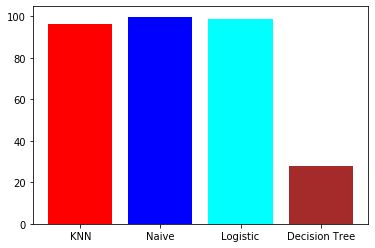

In [8]:
import matplotlib.pyplot as plt
algo=["KNN","Naive","Logistic","Decision Tree"]
per=[96.32,99.73,98.60,27.60]
c=["red","blue","cyan","brown"]
plt.bar(algo,per,color=c)